Develop a model which can identify the flower class depending on Sepal Length and width and Petal length and width.

In [43]:
import numpy as np
import pandas as pd

In [44]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [45]:
type(iris)

sklearn.utils.Bunch

In [46]:
## So we need to transform into dataframe first.
iris_df = pd.DataFrame(iris.data) # iris.data is nothing but a array object
iris_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [47]:
iris_df.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [48]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [49]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [50]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Thus lets set the feature names as the column names.

In [51]:
iris_df.columns = iris.feature_names

In [52]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Lets complete the dataframe by joining with the target column

In [53]:
flower_class = pd.DataFrame({'flower_class':iris.target})
flower_class.head()

,flower_class
0,0
1,0
2,0
3,0
4,0


In [54]:
iris_df_total = pd.concat([iris_df, flower_class], axis=1)
iris_df_total.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### finding the correlation

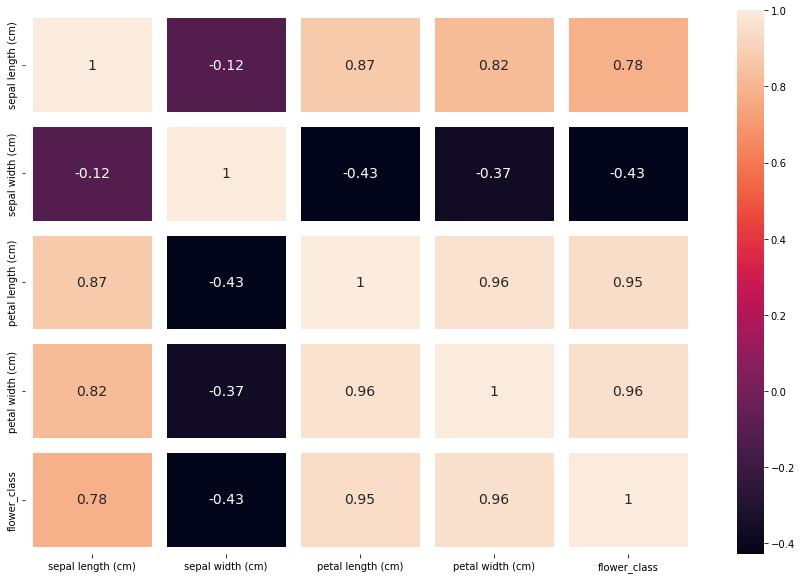

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
df_corr = iris_df_total.corr()
fig = plt.figure(figsize=(15,10))
fig = sns.heatmap(df_corr, linewidth = 15, annot = True, annot_kws={'fontsize':14})


In [57]:
df_corr.flower_class.sort_values(ascending=False)

flower_class         1.000000
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)    -0.426658
Name: flower_class, dtype: float64

#### So sepal width is not correlated at all. Lets not take that as the independent features.
* now another modification has to be done. As we are craeting a single perceptron model, thats why, the target variable should be a binary variable ie. conatining only the 0s and 1s. So we gotta remove this 2.
* Here, from the dataset description we know that, Setosa --> 0, versicolor --> 1, verginica --> 2
* lets make our target variable such that it will return 1 or True for Satosa and 0 or false for any other categories.

In [61]:
y = (iris.target == 0) ## it will just return true which match this condition in the bracket and false otherwise.
y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [62]:
## now to make it 1 and 0 istead true and false
y = y.astype(int)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Thus our target variable is ready.

In [60]:
## independent featurues
X = iris_df.drop('sepal width (cm)', axis = 1)
X.head()

,sepal length (cm),petal length (cm),petal width (cm)
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


# Building the Perceptron

In [64]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

In [65]:
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=1)
per_clf = Perceptron(random_state=42)
per_clf.fit(X_train,y_train)

Perceptron(random_state=42)

In [66]:
y_pred = per_clf.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0])

In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

<AxesSubplot:>

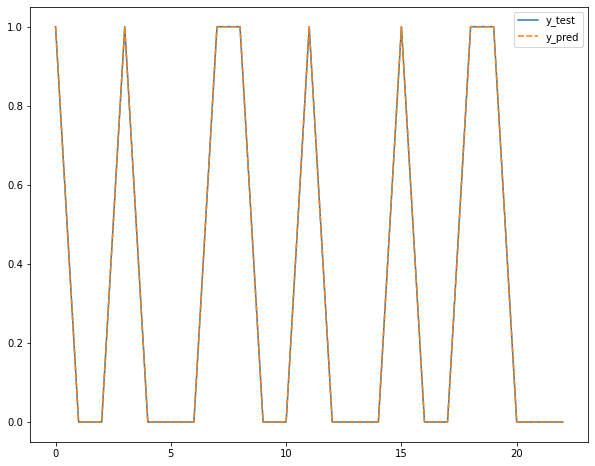

In [77]:
fig = plt.figure(figsize=(10,8))
df_plot = pd.DataFrame({'y_test' : y_test,
                        'y_pred' : y_pred})
sns.lineplot(data=df_plot)


Thus it can be seen that y_pred and y_test are exactly same. So, for this dataset a simple Perceptro model can also predict 100%.

## Now, lets look at the coefficients and intercept value.
Single Perceptron model basically divides the datapoints into two categories by linear regression.

In [78]:
per_clf.coef_

array([[ 5.2, -9.8, -4.7]])

In [79]:
per_clf.intercept_

array([2.])

So, y = 5.2 * speal length + (-9.8)* petal length + (-4.7)* petal_width  + 2.0 is the straight line which is dividing the datapoints. 